##Background
The planet's surface temperature is increasing as greenhouse gas emissions increase, and this global warming and carbon cycle disruption is wreaking havoc on natural systems. Living systems that depend on current temperature, weather, currents and carbon balance are jeopardized, and human society will be forced to contend with widespread economic, social, political and environmental damage as the temperature continues to rise. In these exercises, we examine the relationship between global temperature changes, greenhouse gases and human carbon emissions using time series of actual atmospheric and ice core measurements from the National Oceanic and Atmospheric Administration (NOAA) and Carbon Dioxide Information Analysis Center (CDIAC).

In [57]:
library(tidyverse)
library(dslabs)
data(temp_carbon)
data(greenhouse_gases)
data(historic_co2)

#Question 1

Load the temp_carbon dataset from dslabs, which contains annual global temperature anomalies (difference from 20th century mean temperature in degrees Celsius), temperature anomalies over the land and ocean, and global carbon emissions (in metric tons). Note that the date ranges differ for temperature and carbon emissions.

Which of these code blocks return the latest year for which carbon emissions are reported?


In [58]:
 temp_carbon %>%
    filter(!is.na(carbon_emissions)) %>%
    pull(year) %>%
    max()

[1] 2014

In [59]:
  temp_carbon %>%
    filter(!is.na(carbon_emissions)) %>%
    .$year %>%
    max()

[1] 2014

In [60]:
  temp_carbon %>%
    filter(!is.na(carbon_emissions)) %>%
    select(year) %>%
    max()

[1] 2014

##Question 2

Inspect the difference in carbon emissions in temp_carbon from the first available year to the last available year.

What is the first year for which carbon emissions (carbon_emissions) data are available?


In [61]:
 temp_carbon %>%
    filter(!is.na(carbon_emissions)) %>%
    .$year %>%
    min()

[1] 1751

What is the last year for which carbon emissions data are available?

In [62]:
 temp_carbon %>%
    filter(!is.na(carbon_emissions)) %>%
    .$year %>%
    max()

[1] 2014

How many times larger were carbon emissions in the last year relative to the first year?


In [63]:
carbon1 <- temp_carbon %>%
    filter(year == 1751) %>%
    .$carbon_emissions

carbon2 <- temp_carbon %>%
    filter(year == 2014) %>%
    .$carbon_emissions

carbon2/carbon1

[1] 3285

##Question 3

Inspect the difference in temperature in temp_carbon from the first available year to the last available year.

What is the first year for which global temperature anomaly (temp_anomaly) data are available?

In [64]:
 temp_carbon %>%
    filter(!is.na(temp_anomaly)) %>%
    .$year %>%
    min()
        

[1] 1880

What is the last year for which global temperature anomaly data are available?

In [65]:
 temp_carbon %>%
    filter(!is.na(temp_anomaly)) %>%
    .$year %>%
    max()

[1] 2018

How many degrees Celsius has temperature increased over the date range? Compare the temperatures in the most recent year versus the oldest year.

In [66]:
 temp1 <- temp_carbon %>%
    filter(year == "1880") %>%
    .$temp_anomaly

temp2 <- temp_carbon %>%
    filter(year == "2018") %>%
    .$temp_anomaly

temp2 - temp1

[1] 0.93

##Question 4

Create a time series line plot of the temperature anomaly. Only include years where temperatures are reported. Save this plot to the object p.

Which command adds a blue horizontal line indicating the 20th century mean temperature?

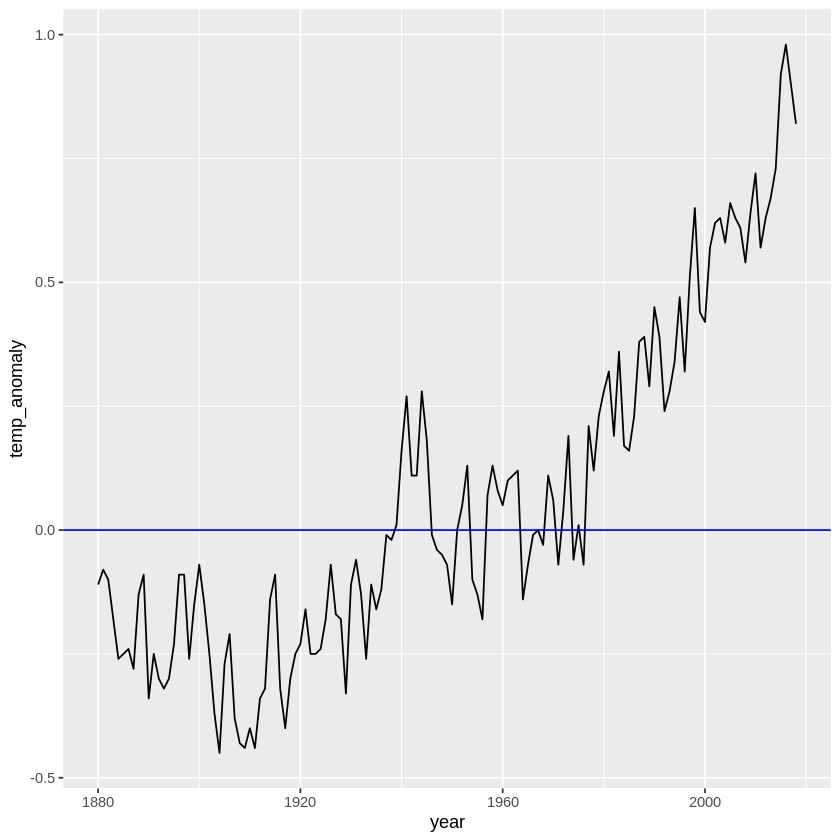

In [67]:
   p <- temp_carbon %>%
    filter(!is.na(temp_anomaly)) %>%
    ggplot(aes(year, temp_anomaly)) +
    geom_line()

p <- p + geom_hline(aes(yintercept = 0), col = "blue")
p

##Question 5

Continue working with p, the plot created in the previous question.

Change the y-axis label to be "Temperature anomaly (degrees C)". Add a title, "Temperature anomaly relative to 20th century mean, 1880-2018". Also add a text layer to the plot: the x-coordinate should be 2000, the y-coordinate should be 0.05, the text should be "20th century mean", and the text color should be blue.

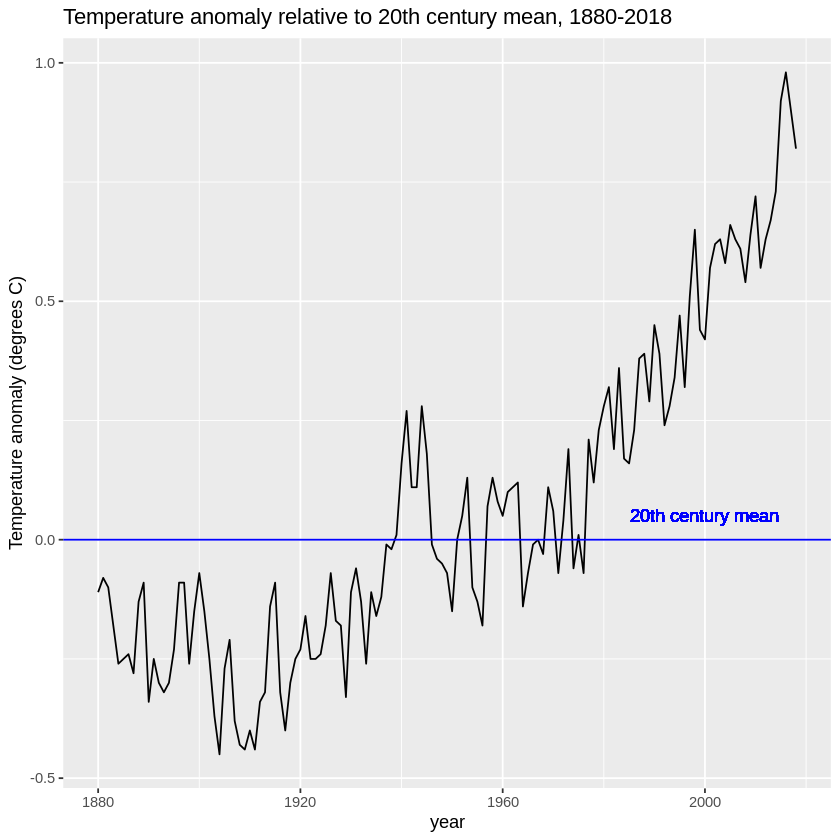

In [70]:
  p + ylab("Temperature anomaly (degrees C)") +
    ggtitle("Temperature anomaly relative to 20th century mean, 1880-2018") +
    geom_text(aes(x = 2000, y = 0.05, label = "20th century mean"), col = "blue")

##Question 6

Use the plot created in the last two exercises to answer the following questions. Answers within 5 years of the correct answer will be accepted.

Warning message:
“Removed 129 row(s) containing missing values (geom_path).”


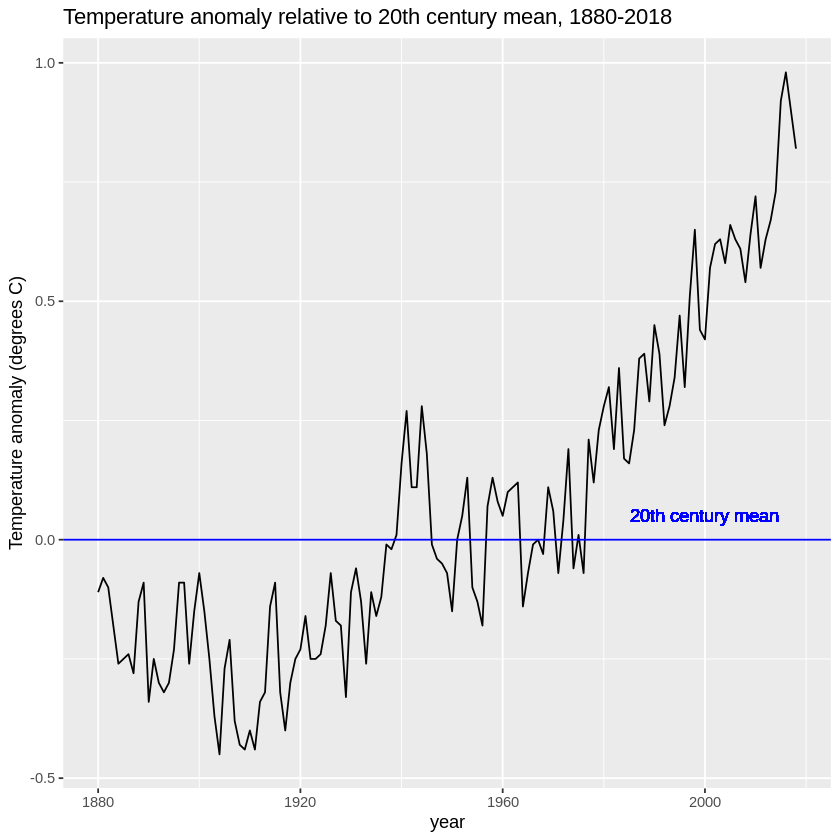

In [72]:
  temp_carbon %>%
    ggplot(aes(year, temp_anomaly)) +
    geom_line() +
    geom_hline(aes(yintercept = 0), col = "blue") +
    ylab("Temperature anomaly (degrees C)") +
    geom_text(aes(x = 2000, y = 0.05, label = "20th century mean"), col = "blue") +
    xlim(c(1880, 2018)) +
    ggtitle("Temperature anomaly relative to 20th century mean, 1880-2018")
        

When was the earliest year with a temperature above the 20th century mean?

In [74]:
temp_carbon%>%
filter(!is.na(temp_anomaly) & temp_anomaly>0) %>%
    .$year %>%
    min()

[1] 1939

When was the last year with an average temperature below the 20th century mean?

In [75]:
temp_carbon%>%
filter(!is.na(temp_anomaly) & temp_anomaly<0) %>%
    .$year %>%
    max()

[1] 1976

In what year did the temperature anomaly exceed 0.5 degrees Celsius for the first time?

In [76]:
temp_carbon%>%
filter(!is.na(temp_anomaly) & temp_anomaly>0.5) %>%
    .$year %>%
    min()

[1] 1997

##Question 7

Add layers to the previous plot to include line graphs of the temperature anomaly in the ocean (ocean_anomaly) and on land (land_anomaly). Assign different colors to the lines. Compare the global temperature anomaly to the land temperature anomaly and ocean temperature anomaly.

Warning message:
“Removed 129 row(s) containing missing values (geom_path).”
Warning message:
“Removed 129 row(s) containing missing values (geom_path).”
Warning message:
“Removed 129 row(s) containing missing values (geom_path).”


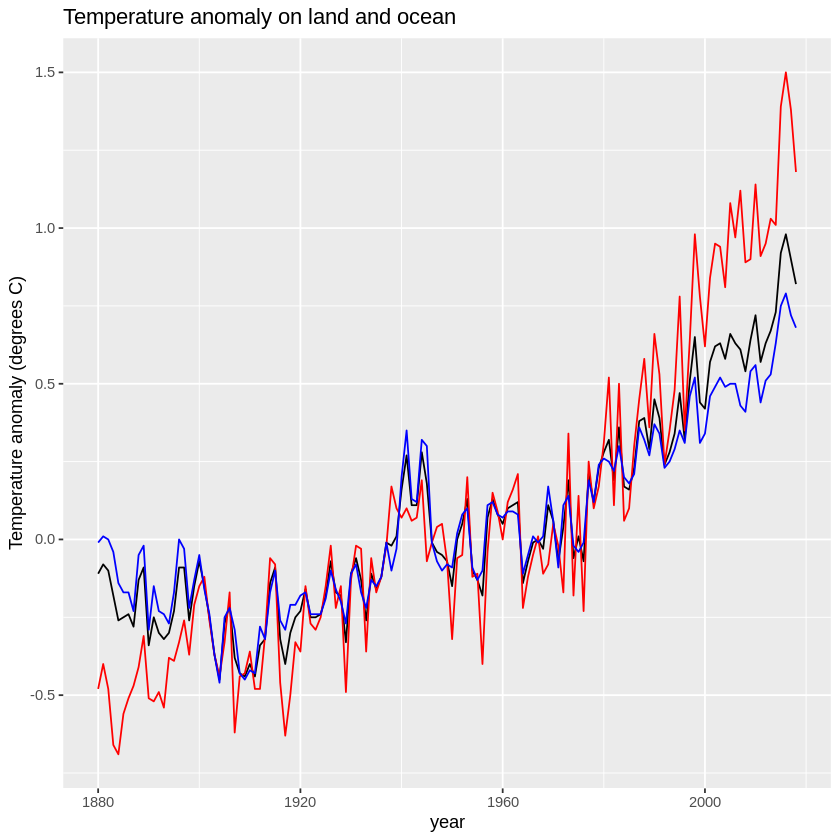

In [77]:
 temp_carbon %>%
    ggplot(aes(year, temp_anomaly)) +
    geom_line() +
    geom_line(aes(year, land_anomaly), col = "red") +
    geom_line(aes(year, ocean_anomaly), col = "blue") +
    ylab("Temperature anomaly (degrees C)") +
    xlim(c(1880, 2018)) +
    ggtitle("Temperature anomaly on land and ocean")

Which region has the largest 2018 temperature anomaly relative to the 20th century mean?

Ans: land

Which region has the largest change in temperature since 1880?

Ans: Land

Which region has a temperature anomaly pattern that more closely matches the global pattern?

Ans: Ocean

#Assessment continues
The climate change exercises continue on this page. Use the libraries and datasets below.

In [32]:
library(tidyverse)
library(dslabs)
data(temp_carbon)
data(greenhouse_gases)
data(historic_co2)

##Question 8

A major determinant of Earth's temperature is the greenhouse effect. Many gases trap heat and reflect it towards the surface, preventing heat from escaping the atmosphere. The greenhouse effect is vital in keeping Earth at a warm enough temperature to sustain liquid water and life; however, changes in greenhouse gas levels can alter the temperature balance of the planet.

The greenhouse_gases data frame from dslabs contains concentrations of the three most significant greenhouse gases: carbon dioxide ( CO2 , abbreviated in the data as co2), methane ( CH4 , ch4 in the data), and nitrous oxide ( N2O , n2o in the data). Measurements are provided every 20 years for the past 2000 years.

Complete the code outline below to make a line plot of concentration on the y-axis by year on the x-axis. Facet by gas, aligning the plots vertically so as to ease comparisons along the year axis. Add a vertical line with an x-intercept at the year 1850, noting the unofficial start of the industrial revolution and widespread fossil fuel consumption. Note that the units for ch4 and n2o are ppb while the units for co2 are ppm.

In [33]:
head(greenhouse_gases)

,year,gas,concentration
,<dbl>,<chr>,<dbl>
1,20,CO2,278
2,40,CO2,278
3,60,CO2,277
4,80,CO2,277
5,100,CO2,278
6,120,CO2,278



```
greenhouse_gases %>%
    ggplot(aes(__________)) +
    geom_line() +
    facet_grid(__________, scales = "free") +
    __________ +
    ylab("Concentration (ch4/n2o ppb, co2 ppm)") +
    ggtitle("Atmospheric greenhouse gas concentration by year, 0-2000")
```

ans: year, concentration or year,concentration

ans:  gas ~ .or rows = vars(gas)

ans: geom_vline(xintercept = 1850) or geom_vline( aes( xintercept = 1850) )

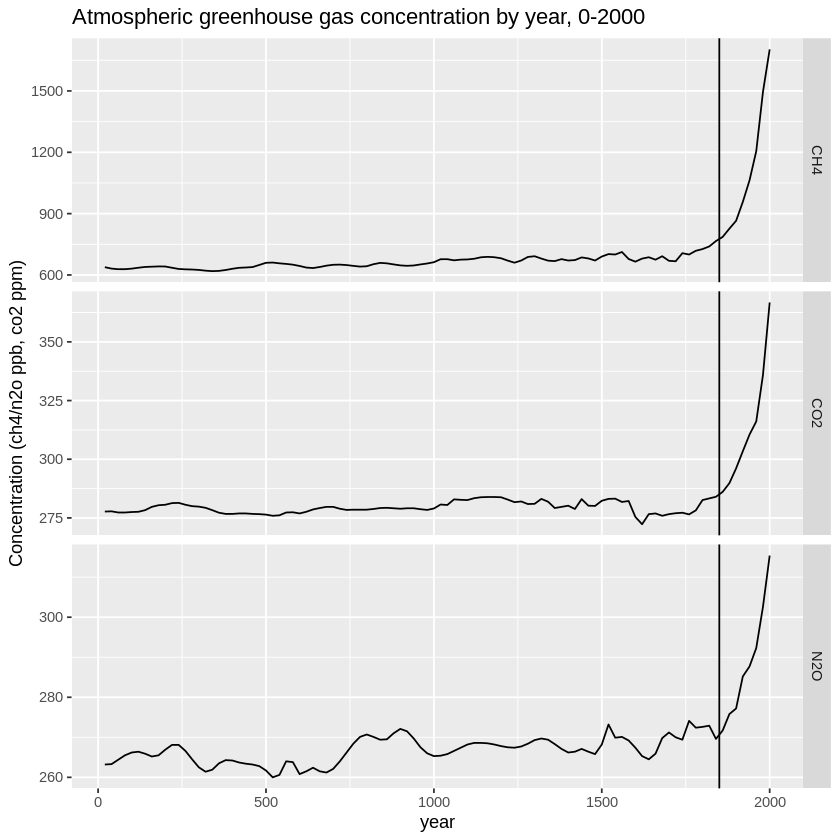

In [49]:
greenhouse_gases %>%
    ggplot(aes(x = year, y = concentration)) +
    geom_line() +
    facet_grid(gas ~ . , scales = "free") +
    geom_vline(xintercept = 1850) +
    ylab("Concentration (ch4/n2o ppb, co2 ppm)") +
    ggtitle("Atmospheric greenhouse gas concentration by year, 0-2000")

#Question 9

Interpret the plot of greenhouse gases over time from the previous question. You will use each answer exactly once ch4, co2, n2o, all, none).


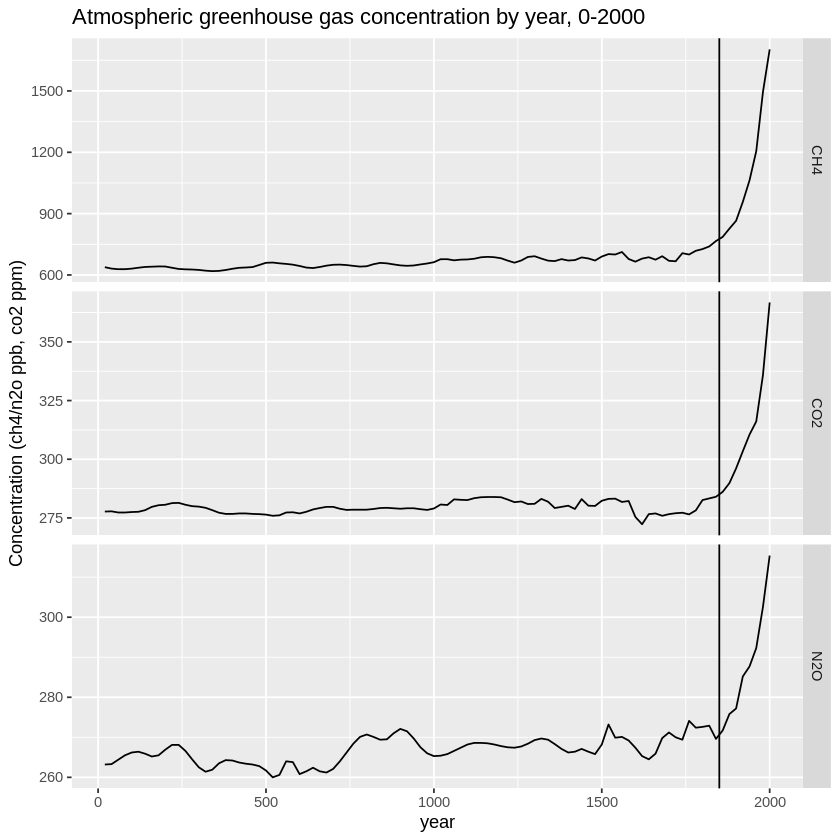

In [50]:
 greenhouse_gases %>%
    ggplot(aes(year, concentration)) +
    geom_line() +
    facet_grid(gas ~ ., scales = "free") +
    geom_vline(xintercept = 1850) +
    xlab("year") +
    ylab("Concentration (ch4/n2o ppb, co2 ppm)") +
    ggtitle("Atmospheric greenhouse gas concentration by year, 0-2000")

- Which gas was stable at approximately 275 ppm/ppb until around 1850?
 
 co2
- Which gas more than doubled in concentration since 1850?

 ch4
- Which gas decreased in concentration since 1850?

  none
- Which gas had the smallest magnitude change since 1850?

 n2o
- Which gas increased exponentially in concentration after 1850?

  all

#Question 10

While many aspects of climate are independent of human influence, and co2 levels can change without human intervention, climate models cannot reconstruct current conditions without incorporating the effect of manmade carbon emissions. These emissions consist of greenhouse gases and are mainly the result of burning fossil fuels such as oil, coal and natural gas.

Make a time series line plot of carbon emissions (carbon_emissions) from the temp_carbon dataset. The y-axis is metric tons of carbon emitted per year.

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


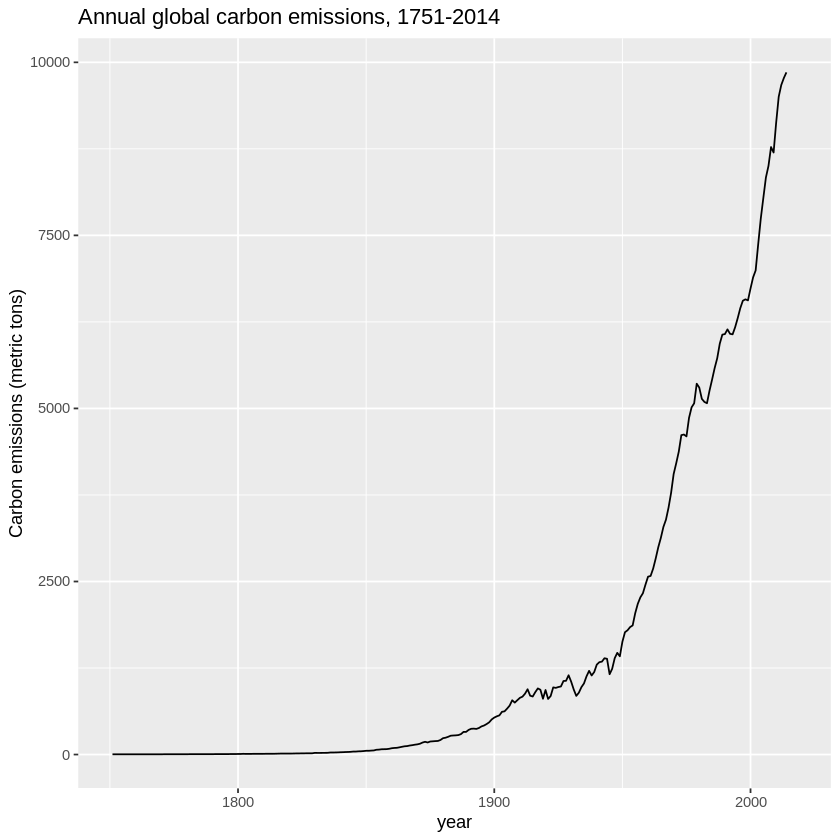

In [51]:
 temp_carbon %>%
    ggplot(aes(year, carbon_emissions)) +
    geom_line() +
    ylab("Carbon emissions (metric tons)") +
    ggtitle("Annual global carbon emissions, 1751-2014")

- Carbon emissions were essentially zero before 1850 and have increased exponentially since then.
- Carbon emissions in 2014 were about 4 times as large as 1960 emissions
- Carbon emissions have doubled since the late 1970s.
- Carbon emissions change with the same trend as atmospheric greenhouse gas levels (co2, ch4, n2o).

##Question 11

We saw how greenhouse gases have changed over the course of human history, but how has  CO2  (co2 in the data) varied over a longer time scale? The historic_co2 data frame in dslabs contains direct measurements of atmospheric co2 from Mauna Loa since 1959 as well as indirect measurements of atmospheric co2 from ice cores dating back 800,000 years.

Make a line plot of co2 concentration over time (year), coloring by the measurement source (source). Save this plot as co2_time for later use.

Which of the following are true about co2_time, the time series of co2 over the last 800,000 years?

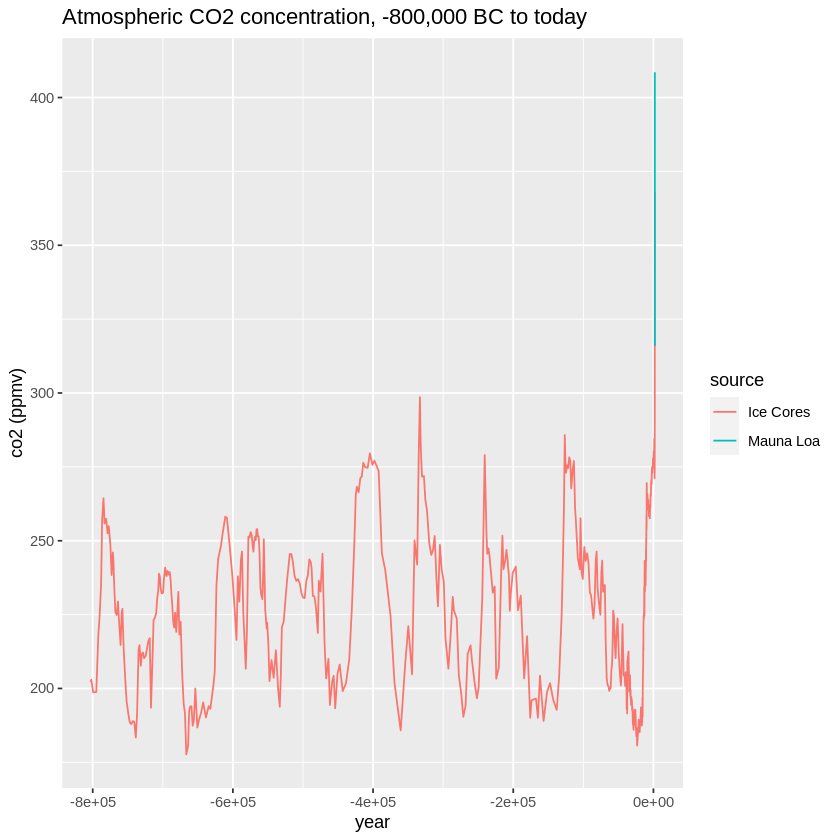

In [52]:
 co2_time <- historic_co2 %>%
    ggplot(aes(year, co2, col = source)) +
    geom_line() +
    ggtitle("Atmospheric CO2 concentration, -800,000 BC to today") +
    ylab("co2 (ppmv)")
co2_time

- Modern co2 levels are higher than at any point in the last 800,000 years.
- There are natural cycles of co2 increase and decrease lasting 50,000-100,000 years per cycle.
- In most cases, it appears to take longer for co2 levels to decrease than to increase.

##Question 12

One way to differentiate natural co2 oscillations from today's manmade co2 spike is by examining the rate of change of co2. The planet is affected not only by the absolute concentration of co2 but also by its rate of change. When the rate of change is slow, living and nonliving systems have time to adapt to new temperature and gas levels, but when the rate of change is fast, abrupt differences can overwhelm natural systems. How does the pace of natural co2 change differ from the current rate of change?

Use the co2_time plot saved above. Change the limits as directed to investigate the rate of change in co2 over various periods with spikes in co2 concentration.

Warning message:
“Removed 683 row(s) containing missing values (geom_path).”


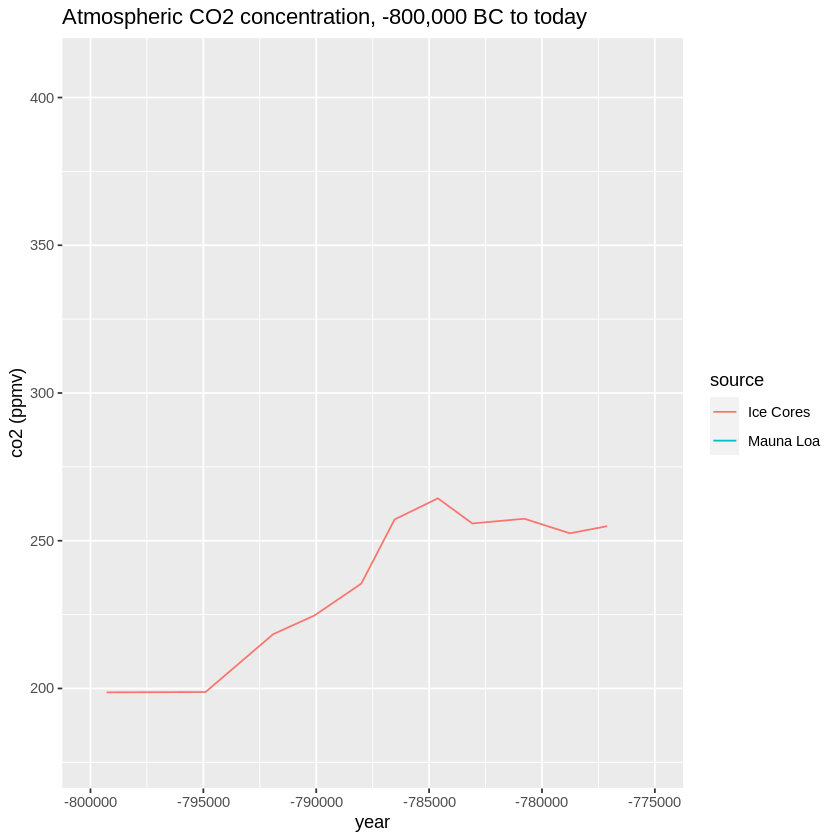

In [53]:
co2_time +xlim(-800000, -775000)

Change the x-axis limits to -800,000 and -775,000. About how many years did it take for co2 to rise from 200 ppmv to its peak near 275 ppmv?

Ans: 10000

Warning message:
“Removed 683 row(s) containing missing values (geom_path).”


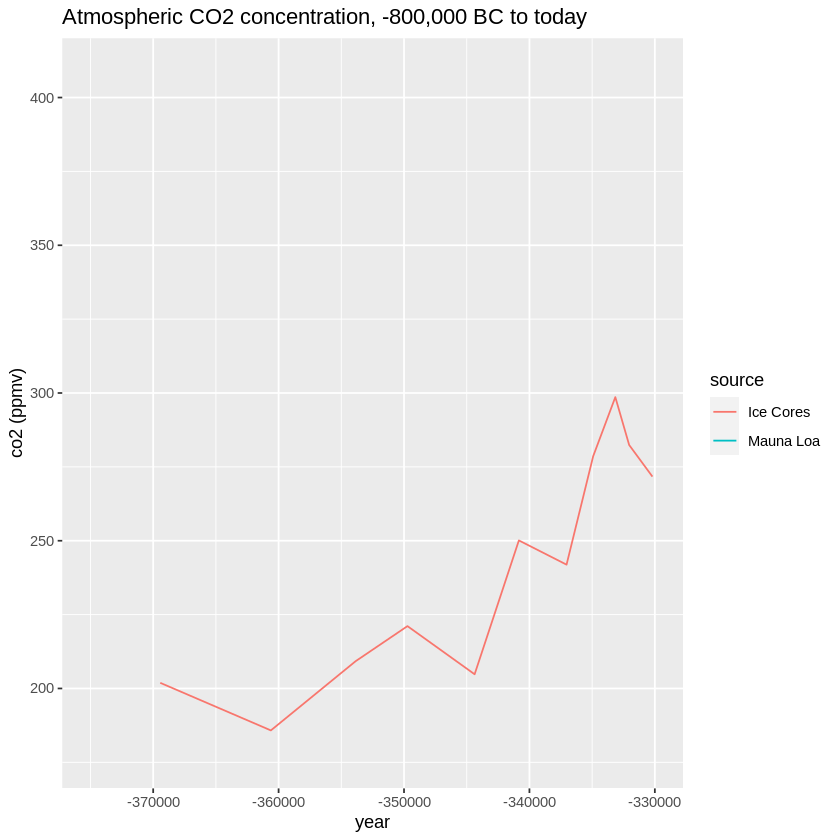

In [54]:
co2_time + xlim(-375000, -330000)

Change the x-axis limits to -375,000 and -330,000. About how many years did it take for co2 to rise from the minimum of 180 ppm to its peak of 300 ppmv?

Ans: 25000

Warning message:
“Removed 683 row(s) containing missing values (geom_path).”


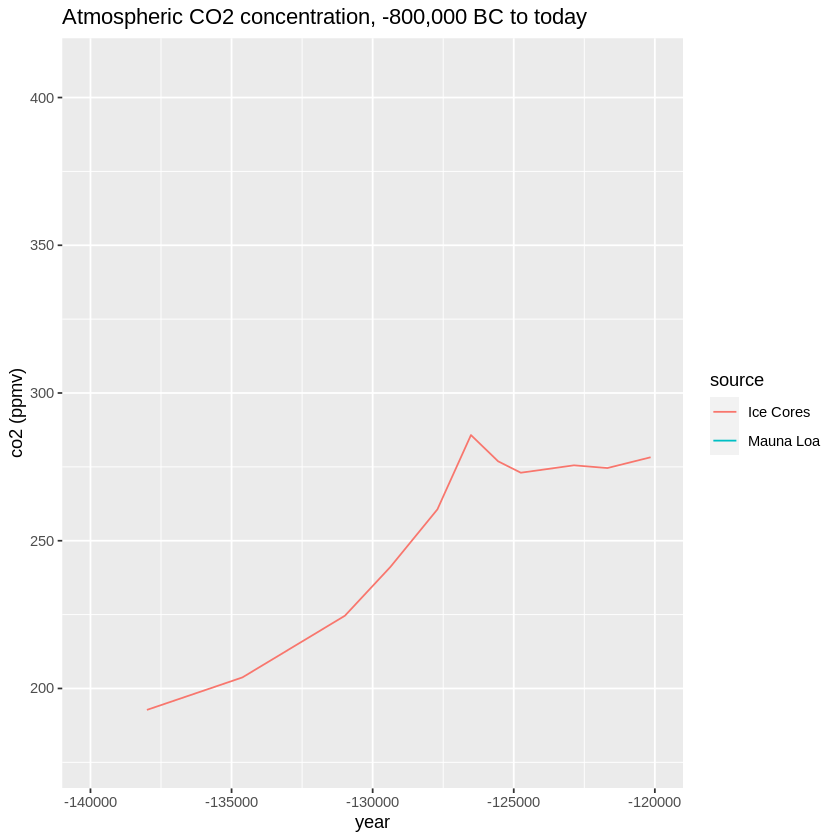

In [55]:
 co2_time + xlim(-140000, -120000)

Change the x-axis limits to -140,000 and -120,000. About how many years did it take for co2 to rise from 200 ppmv to its peak near 280 ppmv?

Ans:9000

Warning message:
“Removed 539 row(s) containing missing values (geom_path).”


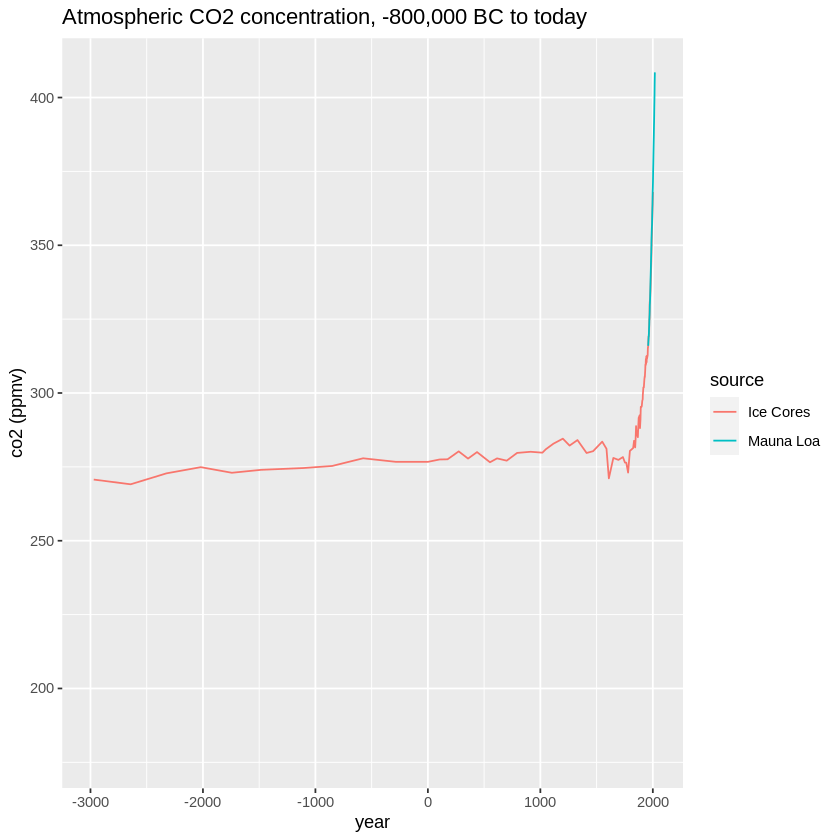

In [56]:
 co2_time + xlim(-3000, 2018)

Change the x-axis limits to -3000 and 2018 to investigate modern changes in co2. About how many years did it take for co2 to rise from its stable level around 275 ppmv to the current level of over 400 ppmv?

Ans: 250